# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#set up empty lists to hold weather info
name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_num = 0
set_num = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    # partial query URL
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    try:
        print(f"Processing Record {city_num} of Set {set_num} | {city}")
        
        response = requests.get(query_url + city).json()
        
        #add weather data for city into lists
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        
        if city_num == 49:
            #reset record number to 0
            city_num = 0
            #increase set number by 1
            set_num += 1
        else:
            #increase record number by 1            
            city_num += 1
            
    except:
        print(f"City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | vaini
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | dillon
Processing Record 4 of Set 1 | iracoubo
Processing Record 5 of Set 1 | jabiru
City not found. Skipping...
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | skelleftea
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | palasa
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | dosso
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | kontagora
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#combine city and weather data into dictionary
cities_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}
#create df
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,66.36,100,20,1.14,TO,1654284469
1,Punta Arenas,-53.1500,-70.9167,41.11,60,75,16.11,CL,1654284278
2,Jamestown,42.0970,-79.2353,71.73,31,40,12.66,US,1654284470
3,Dillon,34.4166,-79.3712,90.23,38,75,6.64,US,1654284470
4,Iracoubo,5.4802,-53.2011,76.41,90,100,12.73,GF,1654284470


In [5]:
#save df to csv
cities_df.to_csv("../output_data/cities.csv")

In [6]:
#create summary table
cities_sum_df = cities_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].describe()
cities_sum_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.157488,19.516587,66.710984,68.692308,57.291592,8.517335,1.654285e+09
std,33.304694,89.585637,16.015406,22.837555,40.230774,5.294975,1.321469e+02
min,-54.800000,-175.200000,25.360000,1.000000,0.000000,0.000000,1.654284e+09
25%,-7.776800,-57.369300,54.820000,56.500000,15.500000,4.610000,1.654284e+09
50%,22.566700,23.609700,68.450000,75.000000,75.000000,7.140000,1.654285e+09
75%,48.325600,100.366750,78.900000,86.000000,100.000000,11.630000,1.654285e+09
max,78.218600,177.483300,105.690000,100.000000,100.000000,25.280000,1.654285e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#max humidity in cities df is 100, 
#so there are no cities with > 100% humidity that need to be removed from the df

In [8]:
#  Get the indices of cities that have humidity over 100%.
cities_df.loc[cities_df["Humidity"] > 100].index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#skipping since there are no outliers/cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

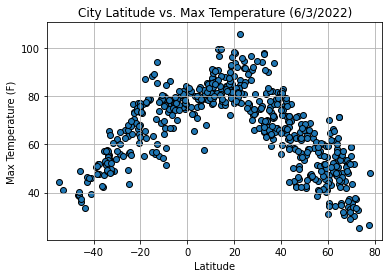

In [10]:
plt.scatter(cities_df['Lat'],cities_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (6/3/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max max temp
plt.ylim([cities_sum_df.iloc[3,2]-5, cities_sum_df.iloc[7,2]+5])
plt.ylabel("Max Temperature (F)")
plt.grid()

#save as png
plt.savefig("../output_data/lat_temp_plot.png")
plt.show()

*Add a sentence or two explaining what the code is analyzing*<br />
This plot is showing the max temperature on June 3 in the cities that we randomly generated. The plot is using the latitude of each city, so this chart is showing how the max temperature compares to each city's distance from the equator. This data shows that max temperatures tend to decrease the further the cities are from the equator (0).

## Latitude vs. Humidity Plot

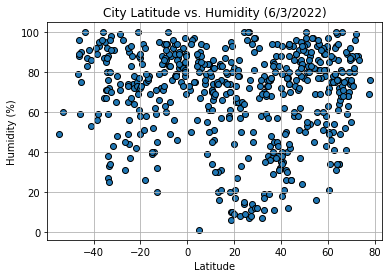

In [12]:
plt.scatter(cities_df['Lat'],cities_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (6/3/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max humidity
plt.ylim([cities_sum_df.iloc[3,3]-5, cities_sum_df.iloc[7,3]+5])
plt.ylabel("Humidity (%)")
plt.grid()

#save as png
plt.savefig("../output_data/lat_humidity_plot.png")
plt.show()

*Add a sentence or two explaining what the code is analyzing*<br />
This code is analyzing the relationship between a city's degree of latitude and its % humidity on June 3. There doesn't seem to be much of a strong connection between these variables.

## Latitude vs. Cloudiness Plot

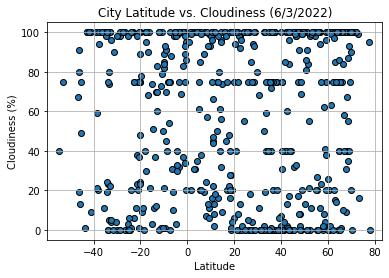

In [14]:
plt.scatter(cities_df['Lat'],cities_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (6/3/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max cloudiness
plt.ylim([cities_sum_df.iloc[3,4]-5, cities_sum_df.iloc[7,4]+5])
plt.ylabel("Cloudiness (%)")
plt.grid()

#save as png
plt.savefig("../output_data/lat_cloudiness_plot.png")
plt.show()

*Add a sentence or two explaining what the code is analyzing*<br />
This code is analyzing the relationship between a city's degree of latitude and its % cloudiness on June 3. There doesn't seem to be much of a strong connection between these variables.

## Latitude vs. Wind Speed Plot

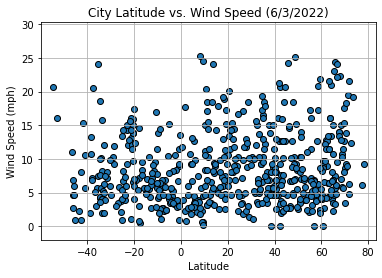

In [47]:
plt.scatter(cities_df['Lat'],cities_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (6/3/2022)")
#setting x axis limits to be +-5 from the min and max latitude
plt.xlim([cities_sum_df.iloc[3,0]-5, cities_sum_df.iloc[7,0]+5])
plt.xlabel("Latitude")
#setting y axis limits to be +-5 from the min and max wind speed
plt.ylim([cities_sum_df.iloc[3,5]-2, cities_sum_df.iloc[7,5]+5])
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save as png
plt.savefig("../output_data/lat_wind_plot.png")
plt.show()

*Add a sentence or two explaining what the code is analyzing*<br />
This code is analyzing the relationship between a city's degree of latitude and its wind speed in mph on June 3. There doesn't seem to be much of a strong connection between these variables.

## Linear Regression

In [18]:
#filtering for only northern hemisphere cities
northern_df = cities_df.loc[cities_df['Lat'] >= 0]

In [19]:
#filtering for only southern hemisphere cities
southern_df = cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8110536881578423
The r-squared is: 0.6578080850744384


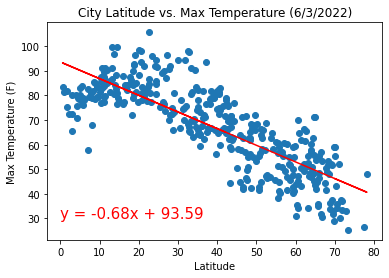

In [20]:
xvalues = northern_df['Lat']
yvalues = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/northern_lat_temp_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and max temperature and on June 3rd in cities in the northern hemisphere (from the cities we randomly generated). R (-.81) shows that there is a strong negative correlation between a city's positive degree of latitude (above the equator) and its maximum temperature on June 3rd. The r<sup>2</sup> value (.66) shows that a city's degree of latitude accounts for 66% of the variation in a city's max temperature on June 3rd.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8221137838103878
The r-squared is: 0.675871073531033


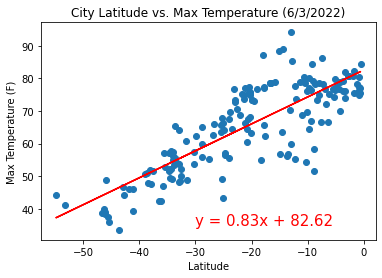

In [23]:
xvalues = southern_df['Lat']
yvalues = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/southern_lat_temp_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and max temperature and on June 3rd in cities in the southern hemisphere (from the cities we randomly generated). R (.82) shows that there is a strong positive correlation between a city's negative degree of latitude (below the equator) and its maximum temperature on June 3rd. The r<sup>2</sup> value (.68) shows that a city's degree of latitude accounts for 68% of the variation in a city's max temperature on June 3rd.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14493863336491775
The r-squared is: 0.02100720744169005


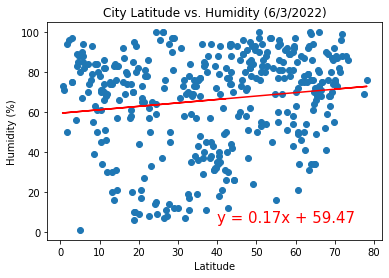

In [26]:
xvalues = northern_df['Lat']
yvalues = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/northern_lat_humidity_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and % humidity and on June 3rd in cities in the northern hemisphere (from the cities we randomly generated). R (.15) shows that there is no correlation (or a very weak correlation) between a city's positive degree of latitude (above the equator) and its humidity on June 3rd. The r<sup>2</sup> value (.02) shows that a city's degree of latitude accounts for 2% of the variation in a city's humidity on June 3rd. This shows that there is no relationship between these two variables.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08757449446957857
The r-squared is: 0.007669292081602248


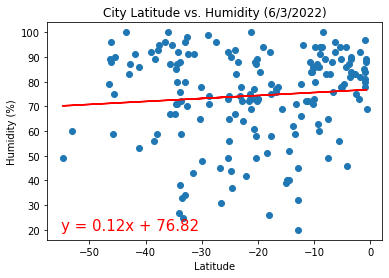

In [28]:
xvalues = southern_df['Lat']
yvalues = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("City Latitude vs. Humidity (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/southern_lat_humidity_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and % humidity and on June 3rd in cities in the southern hemisphere (from the cities we randomly generated). R (.09) shows that there is no correlation (or a very weak correlation) between a city's negative degree of latitude (above the equator) and its humidity on June 3rd. The r<sup>2</sup> value (.01) shows that a city's degree of latitude accounts for 1% of the variation in a city's humidity on June 3rd. This shows that there is no relationship between these two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.045405471651612274
The r-squared is: 0.002061656855905366


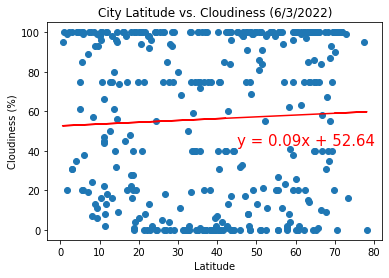

In [33]:
xvalues = northern_df['Lat']
yvalues = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(45,43),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/northern_lat_cloudiness_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and % cloudiness and on June 3rd in cities in the northern hemisphere (from the cities we randomly generated). R (.05) shows that there is no correlation (or a very weak correlation) between a city's positive degree of latitude (above the equator) and its cloudiness on June 3rd. The r<sup>2</sup> value (0.00) shows that a city's degree of latitude accounts for 0% of the variation in a city's cloudiness on June 3rd. This shows that there is no relationship between these two variables.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06251252308301429
The r-squared is: 0.0039078155422043945


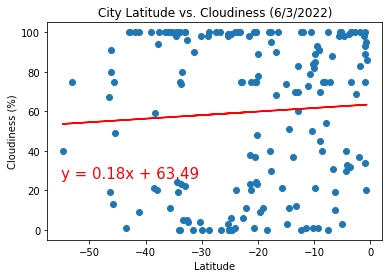

In [37]:
xvalues = southern_df['Lat']
yvalues = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(-55,26),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/southern_lat_cloudiness_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and % cloudiness and on June 3rd in cities in the southern hemisphere (from the cities we randomly generated). R (.06) shows that there is no correlation (or a very weak correlation) between a city's negative degree of latitude (above the equator) and its cloudiness on June 3rd. The r<sup>2</sup> value (0.00) shows that a city's degree of latitude accounts for 0% of the variation in a city's cloudiness on June 3rd. This shows that there is no relationship between these two variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0974969726804742
The r-squared is: 0.009505659681857133


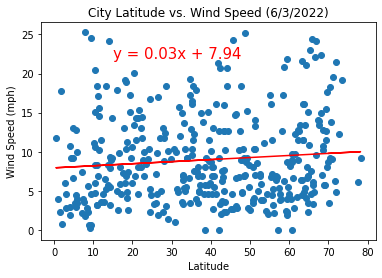

In [42]:
xvalues = northern_df['Lat']
yvalues = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(15,22),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/northern_lat_wind_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and wind speed and on June 3rd in cities in the northern hemisphere (from the cities we randomly generated). R (.10) shows that there is no correlation (or a very weak correlation) between a city's poitive degree of latitude (above the equator) and its wind speed on June 3rd. The r<sup>2</sup> value (.01) shows that a city's degree of latitude accounts for 1% of the variation in a city's wind speed on June 3rd. This shows that there is no relationship between these two variables.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1581697340072561
The r-squared is: 0.025017664755926143


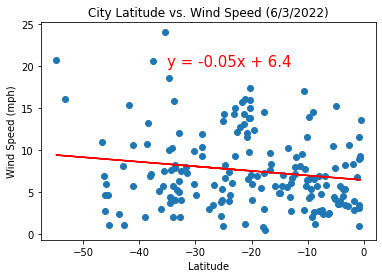

In [45]:
xvalues = southern_df['Lat']
yvalues = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalues, yvalues)
plt.plot(xvalues,regress_values,"r-")
#adding line equation to the scatter plot
plt.annotate(line_eq,(-35,20),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed (6/3/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
#save as png
plt.savefig("../output_data/southern_lat_wind_plot.png")
plt.show()

*Explain what the linear regression is modeling. For example, describe any relationships that you notice and any other findings you may have.*<br />
This regression is showing the relationship between degrees of latitude and wind speed and on June 3rd in cities in the southern hemisphere (from the cities we randomly generated). R (-.16) shows that there is no correlation (or a very weak correlation) between a city's negative degree of latitude (above the equator) and its wind speed on June 3rd. The r<sup>2</sup> value (.03) shows that a city's degree of latitude accounts for 3% of the variation in a city's wind speed on June 3rd. This shows that there is no relationship between these two variables.